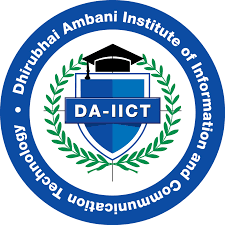

# **Group 18**



1. **Divyesh Rohit           201801086**
2. **Ishani Bandyopadhyay    201801102**
3. **Janvi Patel             201801178**
4. **Tulsi Shah              201801180**
5. **Skand Vala              201801210**


###Importing libraries

In [ ]:
import numpy as np
import pandas as pd


###Importing dataset (from google drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tulsishah309/ML_LAB/main/kaggle_reviews%20-%207282_1%20(1).csv')
dataset=dataset.drop(columns=['reviews.rating'])
dataset.head() 

,name,text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...
3,Hotel Russo Palace,We stayed here for four nights in October. The...
4,Hotel Russo Palace,We stayed here for four nights in October. The...


###Data cleaning

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
total_rows = dataset['name'].count()
print(total_rows)
for i in range(0, total_rows):
  review = re.sub('[^a-zA-Z]', ' ', str(dataset['text'][i]))
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

35912


###Data transformation

In [ ]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='./drive/MyDrive/ML/c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))
cv

CountVectorizer(max_features=1600)

In [ ]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(35912, 1600)

###Predictions by Naive byse(via sentiment classifier)





In [ ]:
import joblib
#Fetching clssifier for Food

classifier1 = joblib.load('./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_naive')
#Fetching clssifier for Safety and Hygiene
classifier2 = joblib.load('./drive/MyDrive/ML/c2_Classifier_Sentiment_Model_naive')
#Fetching clssifier for location
classifier3 = joblib.load('./drive/MyDrive/ML/c3_Classifier_Sentiment_Model_naive')
#Fetching clssifier for value for money
classifier4 = joblib.load('./drive/MyDrive/ML/c4_Classifier_Sentiment_Model_naive')
#Fetching clssifier for hospitality
classifier5 = joblib.load('./drive/MyDrive/ML/c5_Classifier_Sentiment_Model_naive')

In [ ]:
#predication for food
y_pred1 = classifier1.predict(X_fresh)
#predication for Safety and Hygiene
y_pred2 = classifier2.predict(X_fresh)
#predication for location
y_pred3 = classifier3.predict(X_fresh)
#predication for value for money
y_pred4 = classifier4.predict(X_fresh)
#predication for 	hospitality
y_pred5 = classifier5.predict(X_fresh)

In [ ]:
dataset['Food'] = y_pred1.tolist()
dataset['Safety and Hygiene'] = y_pred2.tolist()
dataset['location'] = y_pred3.tolist()
dataset['value for money'] = y_pred4.tolist()
dataset['hospitality'] = y_pred5.tolist()
dataset.head()

,name,text,Food,Safety and Hygiene,location,value for money,hospitality
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,1,1,1,2,2
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...,2,2,2,2,2
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...,1,0,1,0,1
3,Hotel Russo Palace,We stayed here for four nights in October. The...,2,2,2,2,2
4,Hotel Russo Palace,We stayed here for four nights in October. The...,2,2,2,2,2


In [ ]:
hotel = []
food = [];
safe = [];
loc = [];
val = [];
hos = [];

#caculating average rating for every column according to hotel name 
#here we took  bad rating - 1 , Good rating - 3 , Best rating - 5

for i in range(total_rows):

  exist_count=hotel.count(dataset['name'][i])

  if exist_count == 0:
    hotel.append(dataset['name'][i])
    f=0;s=0;h=0;l=0;v=0;cnt=0;
    for j in range(total_rows):
      if dataset['name'][j]==dataset['name'][i] :

        if dataset['Food'][j] == 0:
          f = f + 1;   #bad review
        elif dataset['Food'][j] == 1:
          f = f + 3;   #Good review
        else :
          f = f + 5;   #Best review
        
        if dataset['Safety and Hygiene'][j] == 0:
          s = s + 1;   #bad review
        elif dataset['Safety and Hygiene'][j] == 1:
          s = s + 3;   #Good review
        else :
          s = s + 5;   #Best review

        if dataset['location'][j] == 0:
          l = l + 1;    #bad review
        elif dataset['location'][j] == 1:
          l = l + 3;    #Good review
        else :
          l = l + 5;    #Best review
        
        if dataset['value for money'][j] == 0:
          v = v + 1;     #bad review
        elif dataset['value for money'][j] == 1:
          v = v + 3;     #Good review
        else :
          v = v + 5;     #Best review

        if dataset['hospitality'][j] == 0:
          h = h + 1;     #bad review
        elif dataset['hospitality'][j] == 1:
          h = h + 3;     #Good review
        else :
          h = h + 5;     #Best review

        cnt = cnt + 1;

    if cnt == 0:
      cnt = 1
     
    #taking average according to hotel name
    f = f / cnt;
    s = s / cnt;
    l = l / cnt;
    v = v / cnt;
    h = h / cnt;
    
    f=np.around(f,1)
    s=np.around(s,1)
    l=np.around(l,1)
    v=np.around(v,1)
    h=np.around(h,1)
   

    food.append(f);
    safe.append(s);
    loc.append(l);
    val.append(v);
    hos.append(h);

    




In [ ]:
#making dataframe of ratings according to hotelnames
data = {'hotel':hotel ,'food':food,'Safety and Hygiene':safe,'location':loc,'value for money':val,'hospitality':hos}
df=pd.DataFrame(data)
df


#for finding overall rating of hotel we took average of all five types of rating
rating = [];
for i in range(df['food'].count()):
  allover=0;

  allover = allover + df['food'][i] + df['Safety and Hygiene'][i] + df['location'][i] + df['value for money'][i] + df['hospitality'][i] ;
  allover = allover / 5;
  allover = np.around(allover,1)
  rating.append(allover);

df['Rating']=rating

df

,hotel,food,Safety and Hygiene,location,value for money,hospitality,Rating
0,Hotel Russo Palace,3.0,3.6,3.5,2.9,3.8,3.4
1,Americas Best Value Inn,3.1,2.9,3.7,2.4,2.8,3.0
2,Intermezzo,1.0,1.0,1.0,1.0,1.0,1.0
3,Studio 6,1.0,1.5,1.0,1.0,1.5,1.2
4,Little Paradise Hotel,3.7,4.1,4.0,4.0,4.4,4.0
...,...,...,...,...,...,...,...
874,Holiday Inn Express Hotel and Suites Meadowlan...,3.1,3.6,3.5,2.9,3.5,3.3
875,Sky-lit Motel,3.0,1.0,3.0,1.0,1.0,1.8
876,Simoni's Fremont Inn,1.0,1.0,1.0,1.0,1.0,1.0
877,Elk Springs Resort,3.7,4.2,4.3,3.6,4.1,4.0


In [ ]:
#saved the data on to drive

df.to_csv("./drive/MyDrive/ML/Predicted_Sentiments_Fresh_Dump_naive.csv", encoding='UTF-8', index=False)
#df.to_csv("https://github.com/tulsishah309/ML_LAB/Predicted_Sentiments_Fresh_Dump_naive.csv", encoding='UTF-8', index=False)


**Prediction by KNN algo**

In [ ]:
import joblib
#Fetching clssifier for Food
classifier1 = joblib.load('./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_kNN')
#Fetching clssifier for Safety and Hygiene
classifier2 = joblib.load('./drive/MyDrive/ML/c2_Classifier_Sentiment_Model_kNN')
#Fetching clssifier for location
classifier3 = joblib.load('./drive/MyDrive/ML/c3_Classifier_Sentiment_Model_kNN')
#Fetching clssifier for value for money
classifier4 = joblib.load('./drive/MyDrive/ML/c4_Classifier_Sentiment_Model_kNN')
#Fetching clssifier for hospitality
classifier5 = joblib.load('./drive/MyDrive/ML/c5_Classifier_Sentiment_Model_kNN')

In [ ]:
#predication for food
y_pred1 = classifier1.predict(X_fresh)
#predication for Safety and Hygiene
y_pred2 = classifier2.predict(X_fresh)
#predication for location
y_pred3 = classifier3.predict(X_fresh)
#predication for value for money
y_pred4 = classifier4.predict(X_fresh)
#predication for 	hospitality
y_pred5 = classifier5.predict(X_fresh)

In [ ]:
dataset['Food'] = y_pred1.tolist()
dataset['Safety and Hygiene'] = y_pred2.tolist()
dataset['location'] = y_pred3.tolist()
dataset['value for money'] = y_pred4.tolist()
dataset['hospitality'] = y_pred5.tolist()
dataset.head()

,name,text,Food,Safety and Hygiene,location,value for money,hospitality
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,1,2,1,2,2
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...,1,1,1,1,2
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...,2,2,2,2,2
3,Hotel Russo Palace,We stayed here for four nights in October. The...,1,2,2,2,2
4,Hotel Russo Palace,We stayed here for four nights in October. The...,1,2,2,2,2


In [ ]:
hotel = []
food = [];
safe = [];
loc = [];
val = [];
hos = [];

#caculating average rating for every column according to hotel name 
#here we took  bad rating - 1 , Good rating - 3 , Best rating - 5

for i in range(total_rows):

  exist_count=hotel.count(dataset['name'][i])

  if exist_count == 0:
    hotel.append(dataset['name'][i])
    f=0;s=0;h=0;l=0;v=0;cnt=0;
    for j in range(total_rows):
      if dataset['name'][j]==dataset['name'][i] :

        if dataset['Food'][j] == 0:
          f = f + 1;   #bad review
        elif dataset['Food'][j] == 1:
          f = f + 3;   #Good review
        else :
          f = f + 5;   #Best review
        
        if dataset['Safety and Hygiene'][j] == 0:
          s = s + 1;   #bad review
        elif dataset['Safety and Hygiene'][j] == 1:
          s = s + 3;   #Good review
        else :
          s = s + 5;   #Best review

        if dataset['location'][j] == 0:
          l = l + 1;    #bad review
        elif dataset['location'][j] == 1:
          l = l + 3;    #Good review
        else :
          l = l + 5;    #Best review
        
        if dataset['value for money'][j] == 0:
          v = v + 1;     #bad review
        elif dataset['value for money'][j] == 1:
          v = v + 3;     #Good review
        else :
          v = v + 5;     #Best review

        if dataset['hospitality'][j] == 0:
          h = h + 1;     #bad review
        elif dataset['hospitality'][j] == 1:
          h = h + 3;     #Good review
        else :
          h = h + 5;     #Best review

        cnt = cnt + 1;

    if cnt == 0:
      cnt = 1
     
    #taking average according to hotel name
    f = f / cnt;
    s = s / cnt;
    l = l / cnt;
    v = v / cnt;
    h = h / cnt;
    
    f=np.around(f,1)
    s=np.around(s,1)
    l=np.around(l,1)
    v=np.around(v,1)
    h=np.around(h,1)
   

    food.append(f);
    safe.append(s);
    loc.append(l);
    val.append(v);
    hos.append(h);

In [ ]:
#making dataframe of ratings according to hotelnames
data = {'hotel':hotel ,'food':food,'Safety and Hygiene':safe,'location':loc,'value for money':val,'hospitality':hos}
df=pd.DataFrame(data)
df


#for finding overall rating of hotel we took average of all five types of rating
rating = [];
for i in range(df['food'].count()):
  allover=0;

  allover = allover + df['food'][i] + df['Safety and Hygiene'][i] + df['location'][i] + df['value for money'][i] + df['hospitality'][i] ;
  allover = allover / 5;
  allover = np.around(allover,1)
  rating.append(allover);

df['Rating']=rating

df

,hotel,food,Safety and Hygiene,location,value for money,hospitality,Rating
0,Hotel Russo Palace,4.2,4.8,4.9,4.6,4.7,4.6
1,Americas Best Value Inn,3.6,4.3,4.5,4.3,4.4,4.2
2,Intermezzo,5.0,5.0,5.0,5.0,5.0,5.0
3,Studio 6,5.0,5.0,5.0,5.0,5.0,5.0
4,Little Paradise Hotel,4.0,4.8,4.7,4.5,4.8,4.6
...,...,...,...,...,...,...,...
874,Holiday Inn Express Hotel and Suites Meadowlan...,4.0,4.8,4.8,4.6,4.9,4.6
875,Sky-lit Motel,3.0,5.0,5.0,5.0,5.0,4.6
876,Simoni's Fremont Inn,5.0,5.0,5.0,5.0,5.0,5.0
877,Elk Springs Resort,3.8,4.7,4.8,4.7,4.8,4.6


In [ ]:
#saved the data on to drive

df.to_csv("./drive/MyDrive/ML/Predicted_Sentiments_Fresh_Dump_kNN.csv", encoding='UTF-8', index=False)


Predication by Logistic regression

In [ ]:
import joblib
#Fetching clssifier for Food
classifier1 = joblib.load('./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_log')
#Fetching clssifier for Safety and Hygiene
classifier2 = joblib.load('./drive/MyDrive/ML/c2_Classifier_Sentiment_Model_log')
#Fetching clssifier for location
classifier3 = joblib.load('./drive/MyDrive/ML/c3_Classifier_Sentiment_Model_log')
#Fetching clssifier for value for money
classifier4 = joblib.load('./drive/MyDrive/ML/c4_Classifier_Sentiment_Model_log')
#Fetching clssifier for hospitality
classifier5 = joblib.load('./drive/MyDrive/ML/c5_Classifier_Sentiment_Model_log')

In [ ]:
dataset['Food'] = y_pred1.tolist()
dataset['Safety and Hygiene'] = y_pred2.tolist()
dataset['location'] = y_pred3.tolist()
dataset['value for money'] = y_pred4.tolist()
dataset['hospitality'] = y_pred5.tolist()
dataset.head()

,name,text,Food,Safety and Hygiene,location,value for money,hospitality
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...,1,2,1,2,2
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...,1,1,1,1,2
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...,2,2,2,2,2
3,Hotel Russo Palace,We stayed here for four nights in October. The...,1,2,2,2,2
4,Hotel Russo Palace,We stayed here for four nights in October. The...,1,2,2,2,2


In [ ]:
hotel = []
food = [];
safe = [];
loc = [];
val = [];
hos = [];

#caculating average rating for every column according to hotel name 
#here we took  bad rating - 1 , Good rating - 3 , Best rating - 5

for i in range(total_rows):

  exist_count=hotel.count(dataset['name'][i])

  if exist_count == 0:
    hotel.append(dataset['name'][i])
    f=0;s=0;h=0;l=0;v=0;cnt=0;
    for j in range(total_rows):
      if dataset['name'][j]==dataset['name'][i] :

        if dataset['Food'][j] == 0:
          f = f + 1;   #bad review
        elif dataset['Food'][j] == 1:
          f = f + 3;   #Good review
        else :
          f = f + 5;   #Best review
        
        if dataset['Safety and Hygiene'][j] == 0:
          s = s + 1;   #bad review
        elif dataset['Safety and Hygiene'][j] == 1:
          s = s + 3;   #Good review
        else :
          s = s + 5;   #Best review

        if dataset['location'][j] == 0:
          l = l + 1;    #bad review
        elif dataset['location'][j] == 1:
          l = l + 3;    #Good review
        else :
          l = l + 5;    #Best review
        
        if dataset['value for money'][j] == 0:
          v = v + 1;     #bad review
        elif dataset['value for money'][j] == 1:
          v = v + 3;     #Good review
        else :
          v = v + 5;     #Best review

        if dataset['hospitality'][j] == 0:
          h = h + 1;     #bad review
        elif dataset['hospitality'][j] == 1:
          h = h + 3;     #Good review
        else :
          h = h + 5;     #Best review

        cnt = cnt + 1;

    if cnt == 0:
      cnt = 1
     
    #taking average according to hotel name
    f = f / cnt;
    s = s / cnt;
    l = l / cnt;
    v = v / cnt;
    h = h / cnt;
    
    f=np.around(f,1)
    s=np.around(s,1)
    l=np.around(l,1)
    v=np.around(v,1)
    h=np.around(h,1)
   

    food.append(f);
    safe.append(s);
    loc.append(l);
    val.append(v);
    hos.append(h);

In [ ]:
#making dataframe of ratings according to hotelnames
data = {'hotel':hotel ,'food':food,'Safety and Hygiene':safe,'location':loc,'value for money':val,'hospitality':hos}
df=pd.DataFrame(data)
df


#for finding overall rating of hotel we took average of all five types of rating
rating = [];
for i in range(df['food'].count()):
  allover=0;

  allover = allover + df['food'][i] + df['Safety and Hygiene'][i] + df['location'][i] + df['value for money'][i] + df['hospitality'][i] ;
  allover = allover / 5;
  allover = np.around(allover,1)
  rating.append(allover);

df['Rating']=rating

df

,hotel,food,Safety and Hygiene,location,value for money,hospitality,Rating
0,Hotel Russo Palace,4.2,4.8,4.9,4.6,4.7,4.6
1,Americas Best Value Inn,3.6,4.3,4.5,4.3,4.4,4.2
2,Intermezzo,5.0,5.0,5.0,5.0,5.0,5.0
3,Studio 6,5.0,5.0,5.0,5.0,5.0,5.0
4,Little Paradise Hotel,4.0,4.8,4.7,4.5,4.8,4.6
...,...,...,...,...,...,...,...
874,Holiday Inn Express Hotel and Suites Meadowlan...,4.0,4.8,4.8,4.6,4.9,4.6
875,Sky-lit Motel,3.0,5.0,5.0,5.0,5.0,4.6
876,Simoni's Fremont Inn,5.0,5.0,5.0,5.0,5.0,5.0
877,Elk Springs Resort,3.8,4.7,4.8,4.7,4.8,4.6


In [ ]:
#saved the data on to drive

df.to_csv("./drive/MyDrive/ML/Predicted_Sentiments_Fresh_Dump_log.csv", encoding='UTF-8', index=False)
